In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [108]:
FILE_DIR = './load.csv'
FIG_DIR = './trend_plots/'

In [109]:
# constants
PREDICT_STEP = 20
INPUT_STEP = 960

N_FEATURE = 1
N_OUPUT = 1

In [110]:
if not os.path.exists(FIG_DIR):
    os.makedirs(FIG_DIR)

In [111]:
data = pd.read_csv(FILE_DIR)
# Convert the 'date' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y/%m/%d %H:%M')
display(data)

,Timestamp,Load
0,2023-01-01 00:00:00,10.89
1,2023-01-01 00:15:00,10.44
2,2023-01-01 00:30:00,10.89
3,2023-01-01 00:45:00,10.29
4,2023-01-01 01:00:00,10.34
...,...,...
35035,2023-12-31 22:45:00,8.10
35036,2023-12-31 23:00:00,6.62
35037,2023-12-31 23:15:00,8.94
35038,2023-12-31 23:30:00,8.25


In [112]:
groups = data.groupby(pd.Grouper(key='Timestamp', freq='D'))

In [113]:
X = []
for date, data in groups:
    X.append(list(data["Load"]))


In [114]:
np.array(X).shape

(365, 96)

In [115]:
score = []
for i in range(3, 13):
    kmeans = KMeans(n_clusters=i, random_state=10, n_init='auto')
    labels = kmeans.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    score.append(silhouette)

[0.25563776724801296, 0.2587022091751681, 0.22997476523163282, 0.22887567142131113, 0.21931310866261644, 0.21480142166760727, 0.20320671458431208, 0.18233496691388357, 0.17934831222971176, 0.17302125349022213]


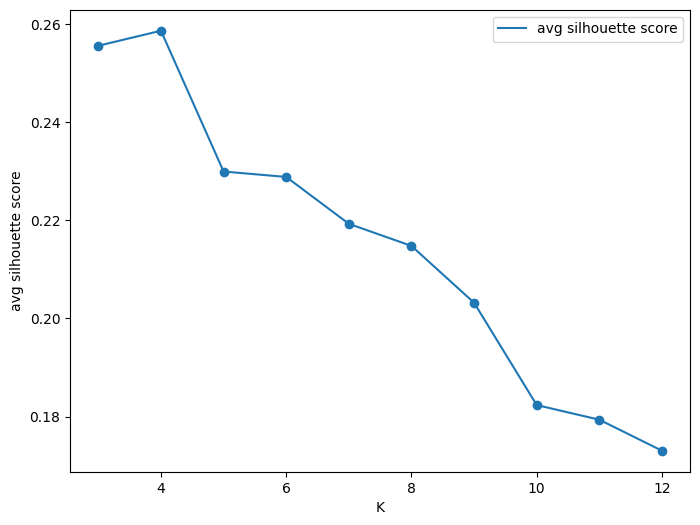

In [116]:
plt.figure(figsize=(8, 6))
K = np.arange(3, 13, 1)
plt.plot(K, score, label='avg silhouette score')
plt.xlabel('K')
plt.ylabel('avg silhouette score')
plt.legend()
plt.scatter(K, score)
plt.savefig(FIG_DIR+'silhouette.png')
print(score)

In [117]:
inertias = []
for n_clusters in range(3, 13):
    kmeans = KMeans(n_clusters=n_clusters, random_state=10, n_init='auto')
    kmeans.fit(X)

    inertias.append(kmeans.inertia_)


[0.25563776724801296, 0.2587022091751681, 0.22997476523163282, 0.22887567142131113, 0.21931310866261644, 0.21480142166760727, 0.20320671458431208, 0.18233496691388357, 0.17934831222971176, 0.17302125349022213]


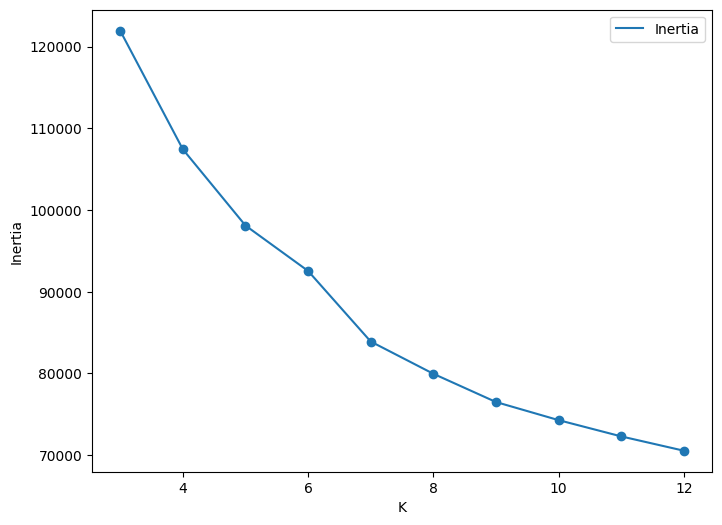

In [118]:
plt.figure(figsize=(8, 6))
K = np.arange(3, 13, 1)
plt.plot(K, inertias, label='Inertia')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.legend()
plt.scatter(K, inertias)
plt.savefig(FIG_DIR+'Inertia.png')
print(score)

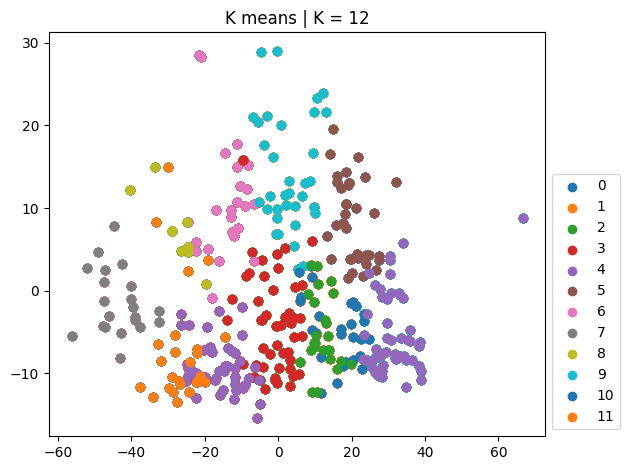

In [121]:
pca = PCA(n_components=2)
r_X = pca.fit_transform(X)

for n_clusters in range(3, 13):
    kmeans = KMeans(n_clusters=n_clusters, random_state=10, n_init='auto')
    label = kmeans.fit_predict(X)

    for i in range(len(np.unique(label))):
        l = np.where(np.array(label) == i)
        plt.scatter(r_X[l, 0], r_X[l, 1], marker = 'o')
    plt.title(f"K means | K = {n_clusters}")
    plt.legend(np.unique(label), bbox_to_anchor = (1, 0), loc = 3,)
    plt.tight_layout()
    plt.savefig(FIG_DIR+f'K{n_clusters}.png')